In [19]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import pandas as pd
from tqdm import tqdm
from glob import glob
import PIL
import numpy as np
import math

AUTOTUNE = tf.data.AUTOTUNE

# Creating the csv

In [31]:
model = tf.keras.models.load_model('classification_model_20220317.h5')

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 3462      
                                                                 
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                             

In [4]:
RES = 224
N_BATCH = 64

N_CLASS = 6
# batch size
N_BATCH = 64
# epoch 수
N_EPOCH = 50
# learning rate
LR = 0.0001


In [34]:
folder_list = os.listdir('seg_train/seg_train')
folder_list

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [35]:
# Making an excel file 
# image_list = glob.glob(folder_list + '*.png')
map = pd.DataFrame(columns=['image_path', '0', '1', '2', '3', '4', '5'])


for folder in folder_list:
    
    images_list = glob.glob('seg_train/seg_train/' + folder + '/*.jpg')
    # print(len(images))
    
    for image_path in images_list:
        # print(type(image))
        # print(images)
        # img = tf.io.decode_image(image_path)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(RES, RES))
        # img = tf.image.decode_jpeg(image_path)
        # img = tf.image.resize(img, (RES, RES))
        # img = tf.keras.preprocessing.resize(img)
        # print(img.shape)
        img_tensor = tf.keras.preprocessing.image.img_to_array(img)
        # print(img_tensor.shape)
        # img_tensor = img_tensor[tf.newaxis, ...]
        pred = model.predict(img_tensor[tf.newaxis, ...])
        
        map = map.append({'image_path' : image_path, 
                    '0' : pred[0][0],
                    '1' : pred[0][1], 
                    '2' : pred[0][2], 
                    '3' : pred[0][3], 
                    '4' : pred[0][4], 
                    '5' : pred[0][5]}, ignore_index=True)
        
        
map


,image_path,0,1,2,3,4,5
0,seg_train/seg_train/buildings\0.jpg,9.378422e-01,1.412629e-04,1.845352e-04,6.163990e-02,1.190094e-04,7.304004e-05
1,seg_train/seg_train/buildings\10006.jpg,9.988797e-01,4.343750e-06,2.242729e-05,1.517587e-05,1.591973e-05,1.062377e-03
2,seg_train/seg_train/buildings\1001.jpg,1.000000e+00,3.916794e-13,2.139663e-12,9.650004e-11,3.415053e-12,2.240160e-11
3,seg_train/seg_train/buildings\10014.jpg,9.999896e-01,4.628066e-07,1.766958e-06,4.848764e-06,1.692099e-06,1.640349e-06
4,seg_train/seg_train/buildings\10018.jpg,9.992831e-01,1.257895e-05,2.382776e-04,3.202595e-04,1.365928e-05,1.320663e-04
...,...,...,...,...,...,...,...
14029,seg_train/seg_train/street\9961.jpg,3.791552e-06,7.277188e-06,1.005679e-07,1.689568e-06,8.491764e-06,9.999787e-01
14030,seg_train/seg_train/street\9967.jpg,9.943823e-07,4.066985e-07,5.342831e-09,5.202847e-08,5.157381e-07,9.999981e-01
14031,seg_train/seg_train/street\9978.jpg,6.967646e-04,1.796203e-06,2.206655e-07,3.127260e-07,4.461860e-07,9.993004e-01
14032,seg_train/seg_train/street\9989.jpg,2.328683e-06,3.296613e-05,2.324246e-07,1.069894e-05,4.905458e-06,9.999489e-01


In [3]:
map.to_csv('classified_map_20220317.csv')

AttributeError: type object 'map' has no attribute 'to_csv'

In [2]:
len(glob('seg_train/seg_train/*/*.jpg'))

14034

In [12]:
# 중복 되는 데이터 점검
for i in range(14034+1):
    img_len = len(glob(f'seg_train/seg_train/*/{i}.jpg'))
    
    if img_len > 1:
        print(i)

In [42]:
tot_images = [] 

for i in range(14034):
# for i in range(3):
    img_name = ''.join(glob(f'seg_train/seg_train/*/{i}.jpg'))
    # print(img_name)
    
    if len(img_name) > 0:
        img = tf.keras.preprocessing.image.load_img(img_name, target_size=(RES, RES))
        img = tf.keras.preprocessing.image.img_to_array(img)
        
    else:
        img = 1
        
    tot_images.append(img) 
    


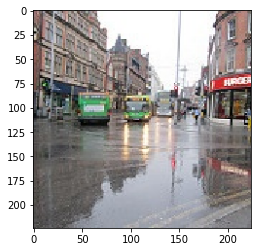

In [46]:
plt.imshow(tot_images[197] / 255)

# Using the csv

In [47]:
classified_map = pd.read_csv('classified_map_20220317.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'classified_map_20220317.csv'

In [3]:
classified_map.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)

In [4]:
# print(get_idx('seg_train/seg_train/street\999.jpg'))
# print(get_label('seg_train/seg_train/street\999.jpg'))

classified_map

,index,image_path,0,1,2,3,4,5
0,0,seg_train/seg_train/buildings\0.jpg,9.378422e-01,1.412629e-04,1.845352e-04,6.163990e-02,1.190094e-04,7.304004e-05
1,1,seg_train/seg_train/buildings\10006.jpg,9.988797e-01,4.343750e-06,2.242729e-05,1.517587e-05,1.591973e-05,1.062377e-03
2,2,seg_train/seg_train/buildings\1001.jpg,1.000000e+00,3.916794e-13,2.139663e-12,9.650004e-11,3.415053e-12,2.240160e-11
3,3,seg_train/seg_train/buildings\10014.jpg,9.999896e-01,4.628066e-07,1.766958e-06,4.848764e-06,1.692099e-06,1.640349e-06
4,4,seg_train/seg_train/buildings\10018.jpg,9.992831e-01,1.257895e-05,2.382776e-04,3.202595e-04,1.365928e-05,1.320663e-04
...,...,...,...,...,...,...,...,...
14029,14029,seg_train/seg_train/street\9961.jpg,3.791552e-06,7.277188e-06,1.005679e-07,1.689568e-06,8.491764e-06,9.999787e-01
14030,14030,seg_train/seg_train/street\9967.jpg,9.943823e-07,4.066985e-07,5.342831e-09,5.202847e-08,5.157381e-07,9.999981e-01
14031,14031,seg_train/seg_train/street\9978.jpg,6.967646e-04,1.796203e-06,2.206655e-07,3.127260e-07,4.461860e-07,9.993004e-01
14032,14032,seg_train/seg_train/street\9989.jpg,2.328683e-06,3.296613e-05,2.324246e-07,1.069894e-05,4.905458e-06,9.999489e-01


In [5]:
def get_idx(x):
    # str = x.split('/')
    return x.split('\\')[1][:-4]

In [6]:
def get_label(x):
    return x.split('/')[2].split('\\')[0]

In [7]:
classified_map['idx'] = classified_map.image_path.map(get_idx)
classified_map['label'] = classified_map.image_path.map(get_label)

In [8]:
tt = pd.get_dummies(classified_map['label'])


In [9]:
all_df = pd.concat([classified_map, tt], axis=1)
all_df

,index,image_path,0,1,2,3,4,5,idx,label,buildings,forest,glacier,mountain,sea,street
0,0,seg_train/seg_train/buildings\0.jpg,9.378422e-01,1.412629e-04,1.845352e-04,6.163990e-02,1.190094e-04,7.304004e-05,0,buildings,1,0,0,0,0,0
1,1,seg_train/seg_train/buildings\10006.jpg,9.988797e-01,4.343750e-06,2.242729e-05,1.517587e-05,1.591973e-05,1.062377e-03,10006,buildings,1,0,0,0,0,0
2,2,seg_train/seg_train/buildings\1001.jpg,1.000000e+00,3.916794e-13,2.139663e-12,9.650004e-11,3.415053e-12,2.240160e-11,1001,buildings,1,0,0,0,0,0
3,3,seg_train/seg_train/buildings\10014.jpg,9.999896e-01,4.628066e-07,1.766958e-06,4.848764e-06,1.692099e-06,1.640349e-06,10014,buildings,1,0,0,0,0,0
4,4,seg_train/seg_train/buildings\10018.jpg,9.992831e-01,1.257895e-05,2.382776e-04,3.202595e-04,1.365928e-05,1.320663e-04,10018,buildings,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,14029,seg_train/seg_train/street\9961.jpg,3.791552e-06,7.277188e-06,1.005679e-07,1.689568e-06,8.491764e-06,9.999787e-01,9961,street,0,0,0,0,0,1
14030,14030,seg_train/seg_train/street\9967.jpg,9.943823e-07,4.066985e-07,5.342831e-09,5.202847e-08,5.157381e-07,9.999981e-01,9967,street,0,0,0,0,0,1
14031,14031,seg_train/seg_train/street\9978.jpg,6.967646e-04,1.796203e-06,2.206655e-07,3.127260e-07,4.461860e-07,9.993004e-01,9978,street,0,0,0,0,0,1
14032,14032,seg_train/seg_train/street\9989.jpg,2.328683e-06,3.296613e-05,2.324246e-07,1.069894e-05,4.905458e-06,9.999489e-01,9989,street,0,0,0,0,0,1


In [10]:
def return_rank(df, rank):
    rank_list = np.array(df[['0', '1', '2', '3', '4', '5']])
    
    temp = rank_list.argsort() 
    ranks = temp.argsort()
    
    # print(ranks[rank])
    return ranks[rank]


In [31]:
def aug(image, label):
    image = tf.image.random_crop(image, [RES, RES, 3])
    image = tf.image.random_flip_left_right(image)
    return image, label

In [13]:
# images = [] 
# labels = [] 

# imgs = []
# labs = [] 

classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

for idx, val in all_df.iterrows():
    
    # image
    img1 = tf.keras.preprocessing.image.load_img(val['image_path'], target_size=(RES, RES))
    image1 = tf.keras.preprocessing.image.img_to_array(img1)
    
    # label 
    label1 = val[classes].to_numpy() 
    
    APPLY = tf.cast(tf.random.uniform(()) >= 0.5, tf.int32) 
    
    
    # randomely picked
    rand_df = all_df.sample(n=1)
    
    # randomly picked image
    img2 = tf.keras.preprocessing.image.load_img(rand_df['image_path'].values[0], target_size=(RES, RES))
    image2 = tf.keras.preprocessing.image.img_to_array(img2)
    
    label2 = rand_df[classes].to_numpy()
    

    w = RES 
    h = RES 

    lam = tf.random.uniform(())
    cut_ratio = tf.math.sqrt(1.-lam) 
    cut_w = tf.cast(w * cut_ratio, tf.int32) * APPLY
    cut_h = tf.cast(h * cut_ratio, tf.int32) * APPLY

    cx = tf.random.uniform((), int(w/8), int(7/8*w), tf.int32)
    cy = tf.random.uniform((), int(h/8), int(7/8*h), tf.int32)

    xmin = tf.clip_by_value(cx - cut_w//2, 0, w)
    ymin = tf.clip_by_value(cy - cut_h//2, 0, h)
    xmax = tf.clip_by_value(cx + cut_w//2, 0, w)
    ymax = tf.clip_by_value(cy + cut_h//2, 0, h)
    
    mid_left = image1[ymin:ymax, :xmin, :]
    mid_mid = image2[ymin:ymax, xmin:xmax, :]
    mid_right = image1[ymin:ymax, xmax:, :]
    middle = tf.concat([mid_left, mid_mid, mid_right], axis=1) 
    top = image1[:ymin, :, :]
    bottom = image1[ymax:, :, :]

    new_imgs = tf.concat([top, middle, bottom], axis=0)
    imgs.append(new_imgs)

    cut_w_mod = xmax - xmin
    cut_h_mod = ymax - ymin

    alpha = tf.cast((cut_w_mod * cut_h_mod) / (w*h), tf.float32)
    

    new_label = ((1-alpha) * label1 + alpha * label2) 
    labs.append(new_label)
    
    # image augmentation 
    aug_img,  aug_lbl= aug(image1, label1) 
    
    imgs.append(aug_img)
    labs.append(aug_lbl)
    
    
images = tf.reshape(tf.stack(imgs), [-1, RES, RES, 3])
labels = tf.reshape(tf.stack(labs), [-1, 6])

# APPLY = tf.cast(tf.random.uniform(()) >= 0.5, tf.int32) 

print(images.shape)
print(labels.shape)
    

ResourceExhaustedError: OOM when allocating tensor with shape[28068,224,224,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Pack] name: stack

In [ ]:
val_dir = os.path.join('.', 'seg_test', 'seg_test')

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(RES, RES),
    batch_size=N_BATCH,
    label_mode='categorical'
)

In [ ]:
for image, label in zip(images[:10], labels[:10]):
    plt.imshow(image / 255)
    # print(image.shape)
    print(label)
    plt.show()

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((images, labels))

In [19]:
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Softmax

from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
mobilenetv3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(RES, RES, 3))

In [20]:
def create_model():
    inputs = keras.Input(shape=(RES, RES, 3))
    x = preprocess_input(inputs)
    x = mobilenetv3(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(N_CLASS)(x)
    x = BatchNormalization()(x)
    outpus = Softmax()(x)
    model = keras.Model(inputs=inputs, outputs=outpus)
    return model

In [42]:
# train_ds = train_ds.unbatch().map(aug, num_parallel_calls=AUTOTUNE).batch(N_BATCH, drop_remainder=True).prefetch(AUTOTUNE)
pass

In [43]:
model = create_model()

In [22]:
train_ds = train_ds.shuffle(100).batch(N_BATCH, drop_remainder=True).prefetch(AUTOTUNE)

In [44]:
class CustomSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, max_lr, warmup_steps, decay_steps):
        super(CustomSchedule, self).__init__()
        self.max_lr = max_lr
        self.warmup_steps = warmup_steps
        self.decay_steps = decay_steps

    def __call__(self, step):
        lr = tf.cond(step < self.warmup_steps, 
                     lambda: self.max_lr / self.warmup_steps * step, 
                     lambda: 0.5 * (1+tf.math.cos(math.pi * (step - self.warmup_steps) / self.decay_steps))*self.max_lr)
        return lr

In [45]:
steps_per_epoch = 14034 // N_BATCH

In [46]:
# model.compile(keras.optimizers.Adam(LR), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

lr_schedule = CustomSchedule(LR, 3*steps_per_epoch, N_EPOCH*steps_per_epoch)
model.compile(keras.optimizers.Adam(lr_schedule), 
              loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1), 
              metrics=['accuracy'])

In [47]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [48]:
with tf.device('/GPU:0'):
    hist = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[callback])
    
with tf.device('/GPU:1'):
    hist = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[callback])

Epoch 1/100
219/219 [==============================] - 28s 106ms/step - loss: 2.0611 - accuracy: 0.1416 - val_loss: 1.5859 - val_accuracy: 0.3743
Epoch 2/100
219/219 [==============================] - 22s 101ms/step - loss: 1.7673 - accuracy: 0.3449 - val_loss: 1.2815 - val_accuracy: 0.7307
Epoch 3/100
219/219 [==============================] - 22s 102ms/step - loss: 1.5844 - accuracy: 0.6498 - val_loss: 1.1704 - val_accuracy: 0.8330
Epoch 4/100
219/219 [==============================] - 22s 100ms/step - loss: 1.5339 - accuracy: 0.7396 - val_loss: 1.1777 - val_accuracy: 0.8397
Epoch 5/100
219/219 [==============================] - 22s 102ms/step - loss: 1.5025 - accuracy: 0.7894 - val_loss: 1.1558 - val_accuracy: 0.8620
Epoch 6/100
219/219 [==============================] - 22s 100ms/step - loss: 1.4884 - accuracy: 0.7989 - val_loss: 1.1465 - val_accuracy: 0.8723
Epoch 7/100
219/219 [==============================] - 22s 101ms/step - loss: 1.4788 - accuracy: 0.8018 - val_loss: 1.1728 -

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model.save('applying_cutoff_rank_all.h5')

C:\Users\Sehwan Yoo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [28]:
model8 = tf.keras.models.load_model('applying_cutoff_rank8.h5')